# Understanding Over & Underfitting
## Predicting Boston Housing Prices

## Getting Started
In this project, you will use the Boston Housing Prices dataset to build several models to predict the prices of homes with particular qualities from the suburbs of Boston, MA.
We will build models with several different parameters, which will change the goodness of fit for each. 

---
## Data Exploration
Since we want to predict the value of houses, the **target variable**, `'MEDV'`, will be the variable we seek to predict.

### Import and explore the data. Clean the data for outliers and missing values. 

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

boston = pd.read_csv(r'..\data\boston_data.csv')

In [5]:
boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.15876,0.0,10.81,0.0,0.413,5.961,17.5,5.2873,4.0,305.0,19.2,376.94,9.88,21.7
1,0.10328,25.0,5.13,0.0,0.453,5.927,47.2,6.9320,8.0,284.0,19.7,396.90,9.22,19.6
2,0.34940,0.0,9.90,0.0,0.544,5.972,76.7,3.1025,4.0,304.0,18.4,396.24,9.97,20.3
3,2.73397,0.0,19.58,0.0,0.871,5.597,94.9,1.5257,5.0,403.0,14.7,351.85,21.45,15.4
4,0.04337,21.0,5.64,0.0,0.439,6.115,63.0,6.8147,4.0,243.0,16.8,393.97,9.43,20.5


### Next, we want to explore the data. Pick several varibables you think will be most correlated with the prices of homes in Boston, and create plots that show the data dispersion as well as the regression line of best fit.
**Hint:** Use the Seaborn *pairplot* function ([documentation](https://seaborn.pydata.org/generated/seaborn.pairplot.html))

In [6]:
related = boston.drop(columns=['crim','zn','indus','chas','nox','black','dis','ptratio'],axis=1)

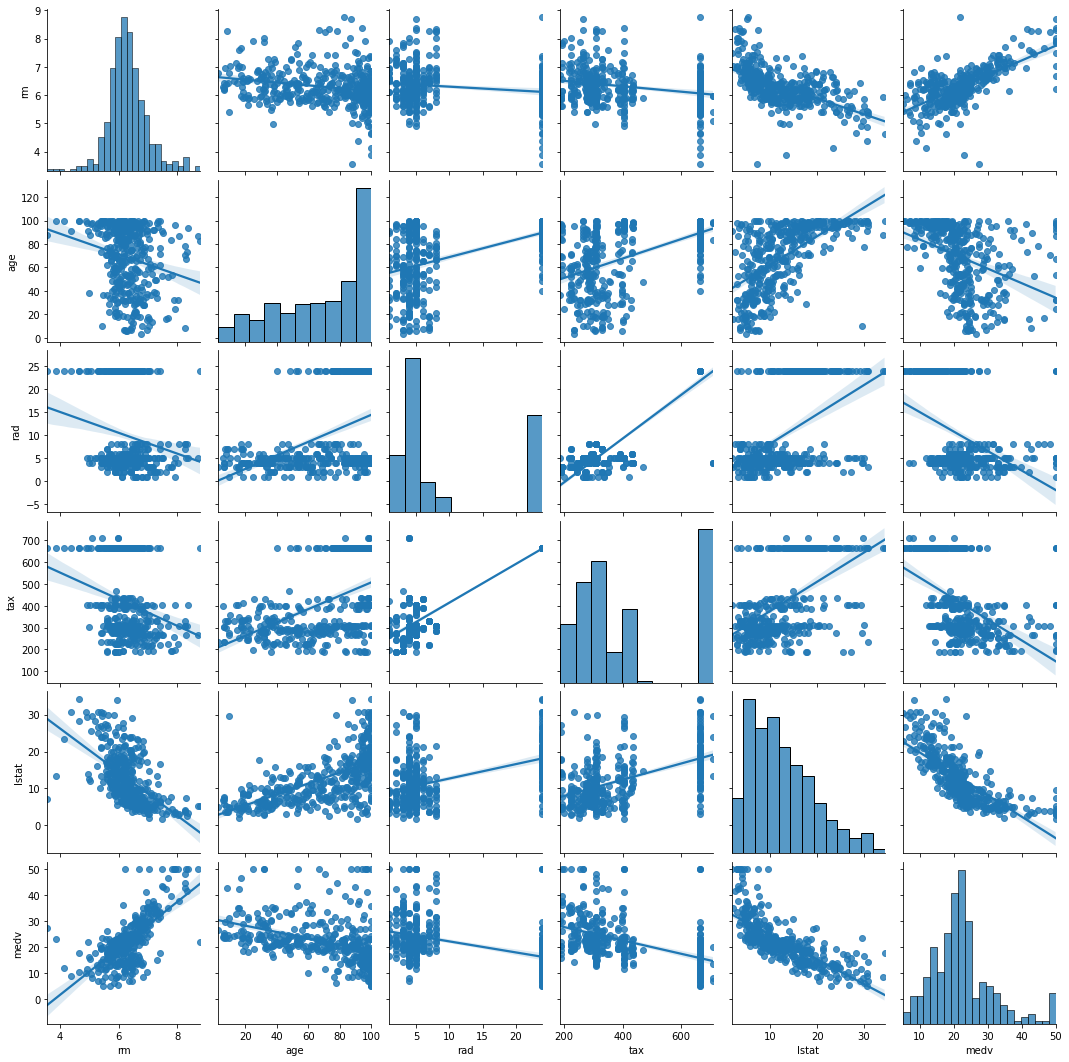

In [7]:
import seaborn as sns

sns.pairplot(data=related, kind='reg')

### What do these plots tell you about the relationships between these variables and the prices of homes in Boston? Are these the relationships you expected to see in these variables?

In [8]:
# Most of the features don't have a direct relationship with the price of homes, apart from the features 'rm' and 'lstat'. 
# I was expecting more correlation by far

### Make a heatmap of the remaining variables. Are there any variables that you did not consider that have very high correlations? What are they?

In [9]:
boston.corrwith(boston['medv']) # No more high related variables between the remaining ones 

crim      -0.400956
zn         0.355608
indus     -0.501698
chas       0.141400
nox       -0.439225
rm         0.683541
age       -0.390863
dis        0.264876
rad       -0.423508
tax       -0.495792
ptratio   -0.506313
black      0.360071
lstat     -0.742695
medv       1.000000
dtype: float64

### Calculate Statistics
Calculate descriptive statistics for housing price. Include the minimum, maximum, mean, median, and standard deviation.
**Hint:** Use the Pandas *series.describe* method ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.describe.html))

In [10]:
boston['medv'].describe()

count    404.000000
mean      22.312376
std        8.837019
min        5.000000
25%       17.100000
50%       21.400000
75%       25.000000
max       50.000000
Name: medv, dtype: float64

----

## Developing a Model

### Implementation: Define a Performance Metric
What is the performance metric with which you will determine the performance of your model? Create a function that calculates this performance metric, and then returns the score. 

In [26]:
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    r2 = r2_score(y_true, y_pred)
    return r2

### Implementation: Shuffle and Split Data
Split the data into the testing and training datasets. Shuffle the data as well to remove any bias in selecting the traing and test (include a *random_state* parameter, see [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)).

In [27]:

from sklearn.model_selection import train_test_split

X = boston[['rm', 'lstat']]
y = boston['medv']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state = 1717)

----

## Analyzing Model Performance
Next, we are going to build a Random Forest Regressor, and test its performance with several different parameter settings.

### Learning Curves
Lets build the different models. Set the max_depth parameter to 2, 4, 6, 8, and 10 respectively. 

In [34]:
max_depth = [2, 4, 6, 8, 10]
r2_train = [] 
r2_test = []

for i in max_depth:
    model1 = RandomForestRegressor(max_depth=i)
    model1.fit(X_train, y_train)
    y_pred = model1.predict(X_train)
    y_test_pred = model1.predict(X_test)
    r2_train.append(r2_score(y_train, y_pred))
    r2_test.append(r2_score(y_test, y_test_pred))
    print('For k =', i,':', 'score for the training set:',r2_score(y_train, y_pred), 
          'R2 score for the test set:',r2_score(y_test, y_test_pred))

For k = 2 : score for the training set: 0.7697785882640114 R2 score for the test set: 0.6832844887094898
For k = 4 : score for the training set: 0.8538187386586368 R2 score for the test set: 0.7327134073477356
For k = 6 : score for the training set: 0.9047854835935522 R2 score for the test set: 0.7473934395851272
For k = 8 : score for the training set: 0.9391872026539156 R2 score for the test set: 0.7437044355661717
For k = 10 : score for the training set: 0.9489925999754462 R2 score for the test set: 0.7411922868879075


Now, plot the score for each tree on the training set and on the testing set.

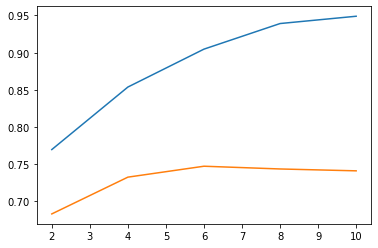

In [35]:
plt.plot(max_depth, r2_train)
plt.plot(max_depth, r2_test)

What do these results tell you about the effect of the depth of the trees on the performance of the model?

In [ ]:
# There is a good performance in 4 or 6, but the curve is so flatten

### Bias-Variance Tradeoff
When the model is trained with a maximum depth of 1, does the model suffer from high bias or from high variance? How about when the model is trained with a maximum depth of 10?

In [36]:
max_depth = [1,10]
r2_train = [] 
r2_test = []

for i in max_depth:
    model1 = RandomForestRegressor(max_depth=i)
    model1.fit(X_train, y_train)
    y_pred = model1.predict(X_train)
    y_test_pred = model1.predict(X_test)
    r2_train.append(r2_score(y_train, y_pred))
    r2_test.append(r2_score(y_test, y_test_pred))
    print('For k =', i,':', 'score for the training set:',r2_score(y_train, y_pred), 
          'R2 score for the test set:',r2_score(y_test, y_test_pred))

For k = 1 : score for the training set: 0.5997691235118208 R2 score for the test set: 0.5337094954546624
For k = 10 : score for the training set: 0.9512490390192538 R2 score for the test set: 0.7500824800395596


### Best-Guess Optimal Model
What is the max_depth parameter that you think would optimize the model? Run your model and explain its performance.

In [ ]:
# I think the best max_depth parameter could be k = 6 as there is  a good R2 score for the test and the training set for this value.

### Applicability
*In a few sentences, discuss whether the constructed model should or should not be used in a real-world setting.*  
**Hint:** Some questions to answering:
- *How relevant today is data that was collected from 1978?*
- *Are the features present in the data sufficient to describe a home?*
- *Is the model robust enough to make consistent predictions?*
- *Would data collected in an urban city like Boston be applicable in a rural city?*

In [ ]:
# I think the data collectted from 1978 is not really relevant today as the times are changing and other factors could be taken into account.

# The features present in the dataset are insufficient as there is not enough correlation between them and the price.

# For this reason, I think the model is not enough robust to make accurate predictions.

# I think data from an urban city like Boston could be not applicable in a rural city